In [1]:
import glob
import numpy as np

In [2]:
frds = glob.glob('output/ccx/*/*.frd')
dats = glob.glob('output/ccx/*/*.dat')
inps = glob.glob('output/ccx/*/*.inp')

In [3]:
inps

['output/ccx\\SX\\main.inp',
 'output/ccx\\SY\\main.inp',
 'output/ccx\\X\\main.inp',
 'output/ccx\\Y\\main.inp']

In [4]:
from djccx.inp.inp import inp
from djccx.frd.readfrd import readfrd

In [5]:
inp_f = inp(inps[3])
frd_f = readfrd(frds[3])

In [ ]:
BOX_PLUS = inp_f.select("BOX_PLUS","elset")
df = BOX_PLUS.GetUniqueNodes(inp_f)
indx_frd = df.index.values
nodes = frd_f["data"].loc[indx_frd]

In [10]:
%matplotlib ipympl

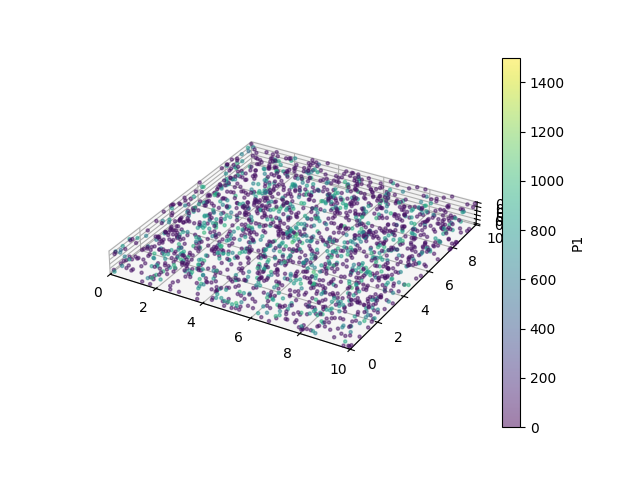

In [18]:
BOX_PLUS = inp_f.select("BOX_PLUS","elset")
df = BOX_PLUS.GetUniqueNodes(inp_f)
nodes = frd_f["data"].loc[df.index.values]

# 3d scatter plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# select random nodes 
idx = np.random.choice(nodes["x"].shape[0], size=np.min([2000, nodes["x"].shape[0]]), 
                       replace=False)
nodes_plot = nodes.iloc[idx]

# color mapping

ax.scatter(nodes_plot["x"], 
           nodes_plot["y"], 
           nodes_plot["z"], 
           c=nodes_plot["P1"], marker='o', s=5, alpha=0.5,vmin=0, vmax=1.5e3, cmap='viridis')

# aspect ratio 1:1:1
ax.set_box_aspect([1,1,0.1])  # aspect ratio is 1:1:1
plt.ylim(0,10)
plt.xlim(0,10)
plt.colorbar(ax.collections[0], ax=ax, label='P1')

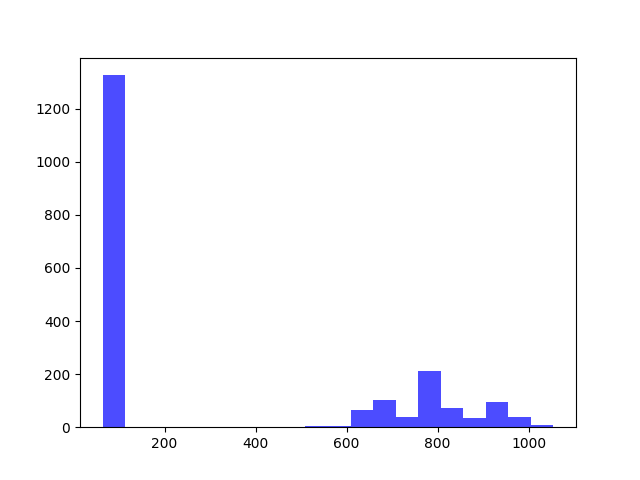

In [21]:
# histogram of P1
fig, ax = plt.subplots()
ax.hist(nodes_plot["P1"], bins=20, color='blue', alpha=0.7);

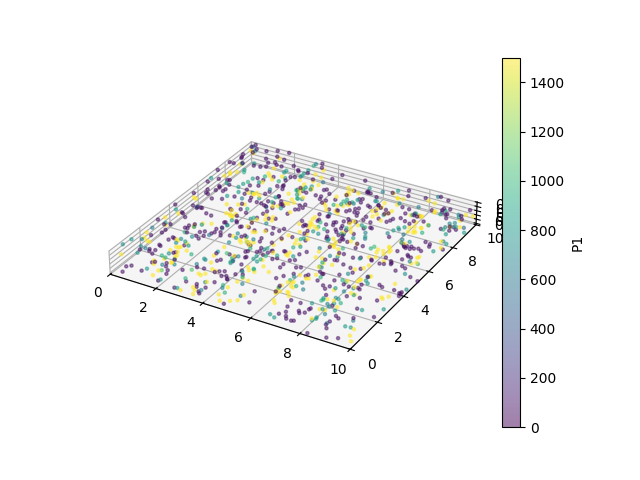

In [22]:


indx_frd = inp_f.nodes.df.index.values
nodes = frd_f["data"].loc[indx_frd]

# 3d scatter plot
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# select random nodes 
idx = np.random.choice(nodes["x"].shape[0], size=np.min([1000, nodes["x"].shape[0]]), 
                       replace=False)
nodes_plot = nodes.iloc[idx]

# color mapping

ax.scatter(nodes_plot["x"], 
           nodes_plot["y"], 
           nodes_plot["z"], 
           c=nodes_plot["P1"], marker='o', s=5, alpha=0.5,vmin=0, vmax=1.5e3, cmap='viridis')

# aspect ratio 1:1:1
ax.set_box_aspect([1,1,0.1])  # aspect ratio is 1:1:1
plt.ylim(0,10)
plt.xlim(0,10)
plt.colorbar(ax.collections[0], ax=ax, label='P1')

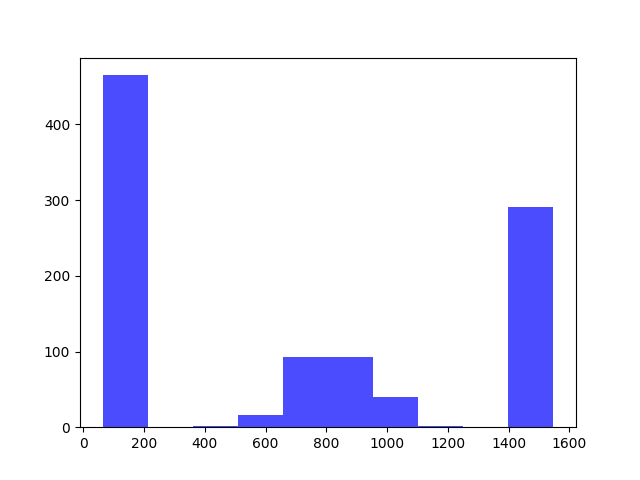

In [23]:
# histogram of P1
fig, ax = plt.subplots()
ax.hist(nodes_plot["P1"], bins=10, color='blue', alpha=0.7);